In [1]:
import string
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marks\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**DBPedia Classes contains 4 columns:**

1 - text

2 - l1: 9 levels of classification

3 - l2: 70 levels of classification

4 - l3: 219 levels of classification

In [2]:
train_df = pd.read_csv('DBPEDIA/DBPEDIA_train.csv')
test_df = pd.read_csv('DBPEDIA/DBPEDIA_test.csv')
val_df = pd.read_csv('DBPEDIA/DBPEDIA_val.csv')

In [3]:
train_df.head()

,text,l1,l2,l3
0,"William Alexander Massey (October 7, 1856 – Ma...",Agent,Politician,Senator
1,Lions is the sixth studio album by American ro...,Work,MusicalWork,Album
2,"Pirqa (Aymara and Quechua for wall, hispaniciz...",Place,NaturalPlace,Mountain
3,Cancer Prevention Research is a biweekly peer-...,Work,PeriodicalLiterature,AcademicJournal
4,The Princeton University Chapel is located on ...,Place,Building,HistoricBuilding


In [4]:
val_df.head()

,text,l1,l2,l3
0,Li Curt is a station on the Bernina Railway li...,Place,Station,RailwayStation
1,Grafton State Hospital was a psychiatric hospi...,Place,Building,Hospital
2,The Democratic Patriotic Alliance of Kurdistan...,Agent,Organisation,PoliticalParty
3,"Ira Rakatansky (October 3, 1919 – March 4, 201...",Agent,Person,Architect
4,Universitatea Reșița is a women handball club ...,Agent,SportsTeam,HandballTeam


In [5]:
test_df.head()

,text,l1,l2,l3
0,Liu Chao-shiuan (Chinese: 劉兆玄; pinyin: Liú Zhà...,Agent,Politician,PrimeMinister
1,"Michelle Maylene (born January 20, 1987) is an...",Agent,Actor,AdultActor
2,Hirfanlı Dam is a dam in Turkey. The developme...,Place,Infrastructure,Dam
3,Grote Prijs Stad Zottegem is a single-day road...,Event,Race,CyclingRace
4,"Johannes Petrus \""Hans\"" Nijman (September 23,...",Agent,Athlete,MartialArtist


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240942 entries, 0 to 240941
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    240942 non-null  object
 1   l1      240942 non-null  object
 2   l2      240942 non-null  object
 3   l3      240942 non-null  object
dtypes: object(4)
memory usage: 7.4+ MB


In [7]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36003 entries, 0 to 36002
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    36003 non-null  object
 1   l1      36003 non-null  object
 2   l2      36003 non-null  object
 3   l3      36003 non-null  object
dtypes: object(4)
memory usage: 1.1+ MB


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60794 entries, 0 to 60793
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    60794 non-null  object
 1   l1      60794 non-null  object
 2   l2      60794 non-null  object
 3   l3      60794 non-null  object
dtypes: object(4)
memory usage: 1.9+ MB


In [9]:
print(train_df['l1'].unique())
print(train_df['l1'].nunique())

['Agent' 'Work' 'Place' 'Species' 'UnitOfWork' 'Event' 'SportsSeason'
 'Device' 'TopicalConcept']
9


In [10]:
train_df['l1'].value_counts()

l1
Agent             124798
Place              45877
Species            21472
Work               21013
Event              19106
SportsSeason        5883
UnitOfWork          1761
TopicalConcept       784
Device               248
Name: count, dtype: int64

In [11]:
print(train_df['l2'].unique())
print(train_df['l2'].nunique())

['Politician' 'MusicalWork' 'NaturalPlace' 'PeriodicalLiterature'
 'Building' 'Animal' 'Organisation' 'Person' 'Athlete' 'Settlement'
 'LegalCase' 'MotorcycleRider' 'Company' 'RouteOfTransportation'
 'SocietalEvent' 'WinterSportPlayer' 'ClericalAdministrativeRegion'
 'EducationalInstitution' 'BodyOfWater' 'Plant' 'Infrastructure'
 'FootballLeagueSeason' 'Actor' 'SportsManager' 'Cleric' 'Boxer' 'Cartoon'
 'Venue' 'Artist' 'Tournament' 'Coach' 'ComicsCharacter' 'Olympics'
 'SportsTeamSeason' 'Software' 'Group' 'Broadcaster' 'Tower' 'Race'
 'SportFacility' 'SportsTeam' 'SportsEvent' 'Eukaryote' 'Scientist'
 'CelestialBody' 'Engine' 'BritishRoyalty' 'Satellite' 'Comic'
 'WrittenWork' 'FictionalCharacter' 'Presenter' 'Horse' 'NaturalEvent'
 'AmusementParkAttraction' 'Writer' 'Song' 'RaceTrack' 'SportsLeague'
 'Genre' 'GridironFootballPlayer' 'Database' 'RacingDriver' 'Wrestler'
 'Stream' 'FloweringPlant' 'Station' 'OrganisationMember' 'MusicalArtist'
 'VolleyballPlayer']
70


In [12]:
print(train_df['l3'].unique())
print(train_df['l3'].nunique())

['Senator' 'Album' 'Mountain' 'AcademicJournal' 'HistoricBuilding'
 'Reptile' 'MilitaryUnit' 'Judge' 'ChessPlayer' 'TradeUnion' 'Musical'
 'Insect' 'Town' 'SupremeCourtOfTheUnitedStatesCase' 'TennisPlayer'
 'SpeedwayRider' 'Publisher' 'GolfPlayer' 'HorseRider' 'ShoppingMall'
 'Road' 'MilitaryPerson' 'Election' 'ArtistDiscography' 'OfficeHolder'
 'IceHockeyPlayer' 'Diocese' 'Library' 'Lake' 'Monarch' 'Conifer' 'Bridge'
 'Dam' 'BasketballPlayer' 'Glacier' 'NationalFootballLeagueSeason'
 'RugbyPlayer' 'Single' 'Mayor' 'VoiceActor' 'SoccerManager' 'Economist'
 'Skier' 'HandballPlayer' 'Saint' 'RecordLabel' 'AmateurBoxer'
 'HollywoodCartoon' 'Theatre' 'Legislature' 'ComicsCreator'
 'GolfTournament' 'MilitaryConflict' 'CollegeCoach' 'AnimangaCharacter'
 'OlympicEvent' 'Convention' 'University' 'BadmintonPlayer'
 'NCAATeamSeason' 'VideoGame' 'Gymnast' 'Amphibian' 'Band'
 'PublicTransitSystem' 'Bird' 'GaelicGamesPlayer' 'Volcano' 'Hotel'
 'Architect' 'MartialArtist' 'BusCompany' 'RadioStation'

### Preparing the Data:

In [13]:
def preprocess(series):
    # Ensure the input is a pandas Series
    if not isinstance(series, pd.Series):
        raise ValueError("Input must be a pandas Series")

    series = series.apply(lambda x: x.lower() if isinstance(x, str) else x)
    series = series.apply(lambda x: re.sub('([0-9])', '', x) if isinstance(x, str) else x)
    series = series.apply(lambda x: ''.join([i for i in x if i not in string.punctuation]) if isinstance(x, str) else x)
    series = series.apply(lambda x: re.sub(' +', ' ', x) if isinstance(x, str) else x)
    return series

In [14]:
train_df['text'] = preprocess(train_df['text'])
train_df.head()

,text,l1,l2,l3
0,william alexander massey october – march was a...,Agent,Politician,Senator
1,lions is the sixth studio album by american ro...,Work,MusicalWork,Album
2,pirqa aymara and quechua for wall hispanicized...,Place,NaturalPlace,Mountain
3,cancer prevention research is a biweekly peerr...,Work,PeriodicalLiterature,AcademicJournal
4,the princeton university chapel is located on ...,Place,Building,HistoricBuilding


In [15]:
val_df['text'] = preprocess(val_df['text'])
val_df.head()

,text,l1,l2,l3
0,li curt is a station on the bernina railway li...,Place,Station,RailwayStation
1,grafton state hospital was a psychiatric hospi...,Place,Building,Hospital
2,the democratic patriotic alliance of kurdistan...,Agent,Organisation,PoliticalParty
3,ira rakatansky october – march was a modernist...,Agent,Person,Architect
4,universitatea reșița is a women handball club ...,Agent,SportsTeam,HandballTeam


In [16]:
test_df['text'] = preprocess(test_df['text'])
test_df.tail()

,text,l1,l2,l3
60789,darwin smith was ceo of kimberlyclark from to ...,Agent,Person,BusinessPerson
60790,the hkru premiership is the main domestic comp...,Agent,SportsLeague,SoccerLeague
60791,leo harvey diegel april – may was an american ...,Agent,Athlete,GolfPlayer
60792,clement reginald clem splatt september – augus...,Agent,Athlete,AustralianRulesFootballPlayer
60793,gyllebo castle swedish gyllebo slott is a cast...,Place,Building,Castle


### Sentence Length:

In [17]:
tm = []
for t in train_df.text:
    tm.append(len(t.split(' ')))

max_length = np.max(tm)
min_length = np.min(tm)

print(f'Largest sentence has length: {max_length}')
print(f'Shortest sentence has length: {min_length}')

Largest sentence has length: 494
Shortest sentence has length: 8


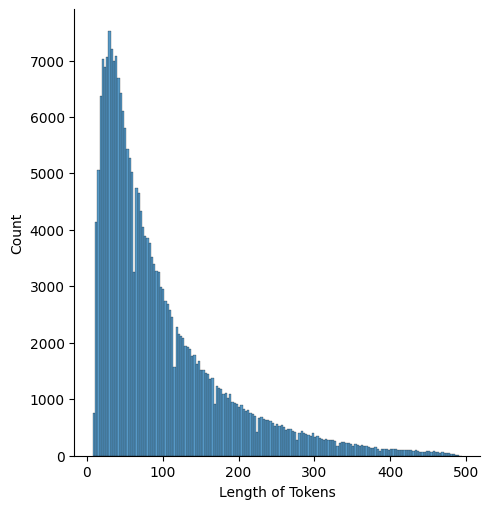

In [18]:
ax = sns.displot(tm)
plt.xlabel('Length of Tokens')
plt.show()

**Most of the sentences are between the length of 10-100.**

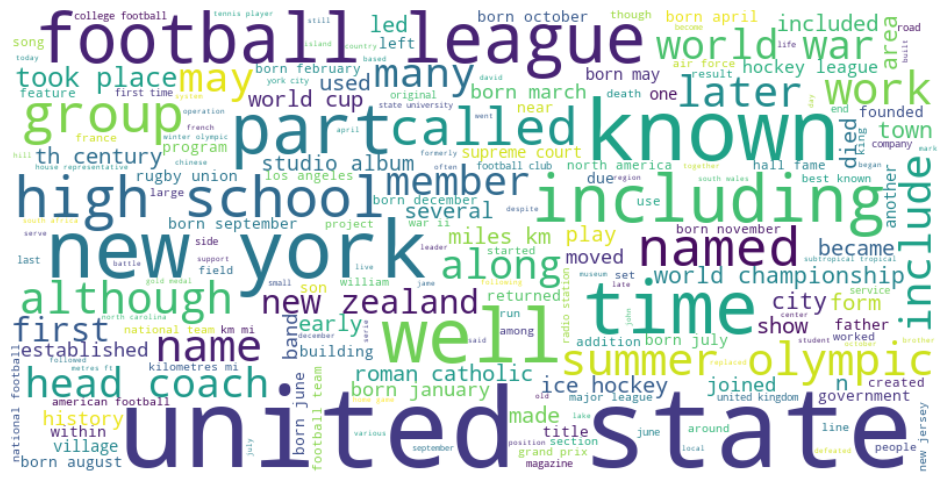

In [19]:
stop_words = set(stopwords.words('english'))

# Tokenize words and remove stop words
words = [word for text in train_df['text'] for word in word_tokenize(text.lower()) if word.isalnum() and word not in stop_words]

# Join filtered words into a single string
filtered_text_data = ' '.join(words)

plt.figure(figsize=(12, 8))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text_data)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [21]:
# Display random samples
random_samples = train_df.sample(n=5)
for index, row in random_samples.iterrows():
    print(f"Text: {row['text']}\nClass: {row[['l1', 'l2', 'l3']].values}\n")

Text: philoxenus anicetus greek φιλόξενος ὁ ἀνίκητος epithet means the invincible was an indogreek king who ruled in the region spanning the paropamisade to punjab philoxenus seems to have been quite an important king who might briefly have ruled most of the indogreek territory bopearachchi dates philoxenus to c – bce and r c senior to c – bce historians have not yet connected philoxenus with any dynasty but he could have been the father of the princess kalliope who was married to the king hermaeus
Class: ['Agent' 'Person' 'Monarch']

Text: the game is a play by harold brighouse first published in as one of three lancashire plays the other two plays being the northerners and zack the play is centred on a fictional football team blackton rovers their star player jack metherell and the family of club owner austin whitworth in the play was adapted into a film the winning goal directed by gb samuelson professional footballer jack cock appeared as himself in the film it was revived by north